In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [14]:
#Load the survey data to the notebook

# Get the path to the "documents" folder
documents_folder = os.path.expanduser('~/Documents')

# Specify the file name
file_name = 'Covid_Responses.csv'

# Construct the full file path
file_path = os.path.join(documents_folder, file_name)

# Load the CSV file into a DataFrame
data = pd.read_csv(file_path)

In [16]:
# Compute summary statistics
summary_stats= data.describe()

# Display the summary statistics
print(summary_stats)


             Age  Before-ClassworkStress  Before-HomeworkStress  \
count  40.000000               40.000000              40.000000   
mean   16.375000                2.375000               3.050000   
std     2.156534                1.294713               1.299901   
min    13.000000                0.000000               0.000000   
25%    15.000000                1.750000               2.000000   
50%    16.000000                2.000000               3.000000   
75%    17.000000                3.000000               4.000000   
max    22.000000                6.000000               5.000000   

       Before-HomeworkHours  Now-ClassworkStress  Now-HomeworkStress  \
count             40.000000            40.000000           40.000000   
mean               2.800000             3.625000            4.375000   
std                2.153709             1.496791            1.314368   
min                0.000000             1.000000            1.000000   
25%                1.000000         

In [7]:
data.head()

,Category,Country,State,Age,Gender,Before-Environment,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-Environment,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships
0,SchoolCollegeTraining,US,TX,14,Male,Physical,1,3,2.0,Virtual,3,5,4.5,2,-1
1,SchoolCollegeTraining,US,MD,13,Male,Physical,5,4,2.0,Virtual,3,5,2.5,1,-2
2,Homeschool,US,TX,16,Female,Virtual,1,3,10.0,Virtual,3,5,15.0,1,-1
3,SchoolCollegeTraining,US,GA,17,Male,Physical,4,4,6.0,Physical,5,1,6.0,0,-2
4,SchoolCollegeTraining,GB,NaN,14,Male,Physical,3,4,4.0,Physical,5,5,6.0,0,1


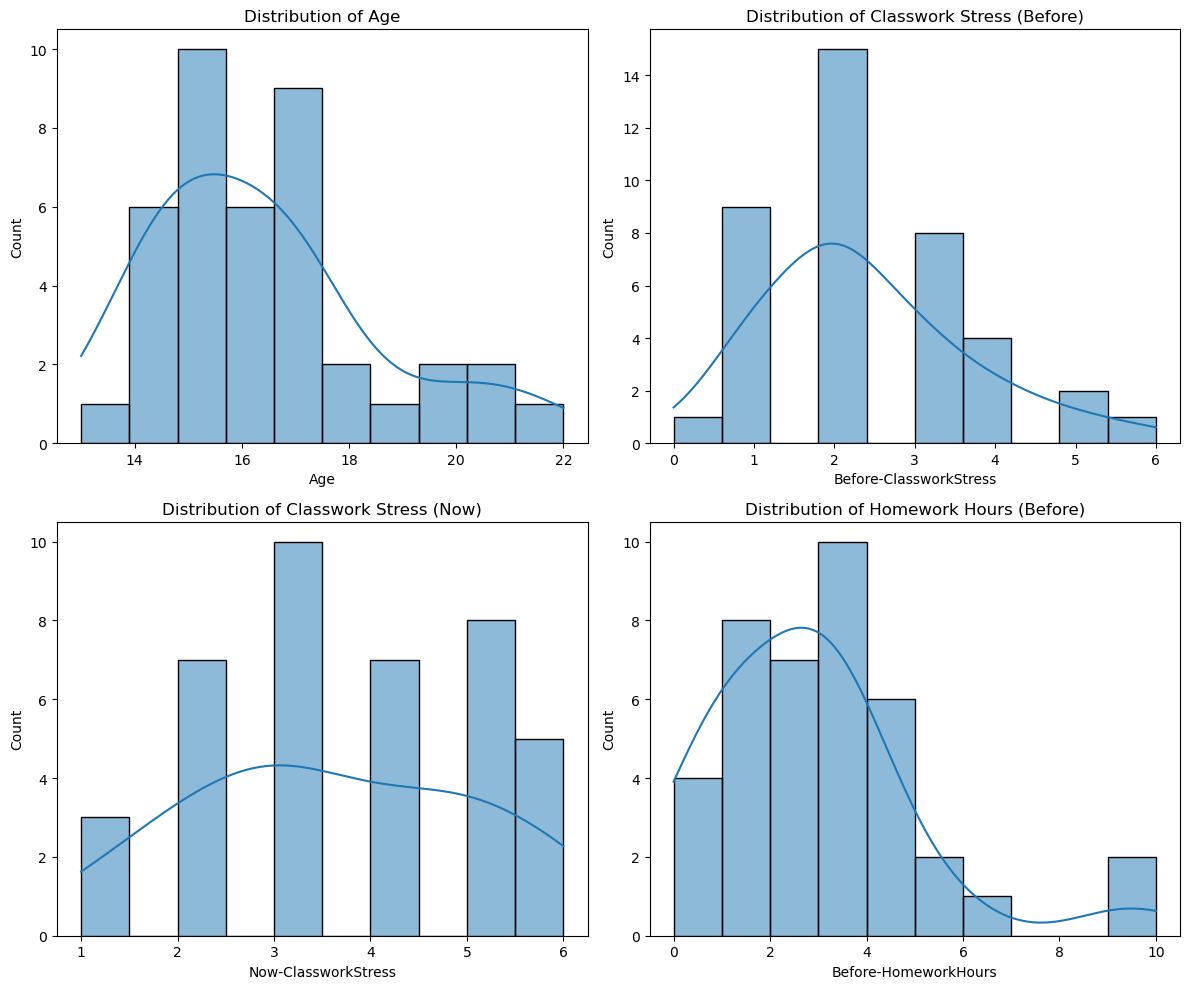

In [22]:
# Set up the figure and axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Create histograms
sns.histplot(data['Age'], ax=axes[0, 0], bins=10, kde=True)
axes[0, 0].set_title('Distribution of Age')

sns.histplot(data['Before-ClassworkStress'], ax=axes[0, 1], bins=10, kde=True)
axes[0, 1].set_title('Distribution of Classwork Stress (Before)')

sns.histplot(data['Now-ClassworkStress'], ax=axes[1, 0], bins=10, kde=True)
axes[1, 0].set_title('Distribution of Classwork Stress (Now)')

sns.histplot(data['Before-HomeworkHours'], ax=axes[1, 1], bins=10, kde=True)
axes[1, 1].set_title('Distribution of Homework Hours (Before)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Convert infinity values to NaN in the dataset
data.replace([np.inf, -np.inf], np.nan, inplace=True)

import warnings

# Suppress all FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)



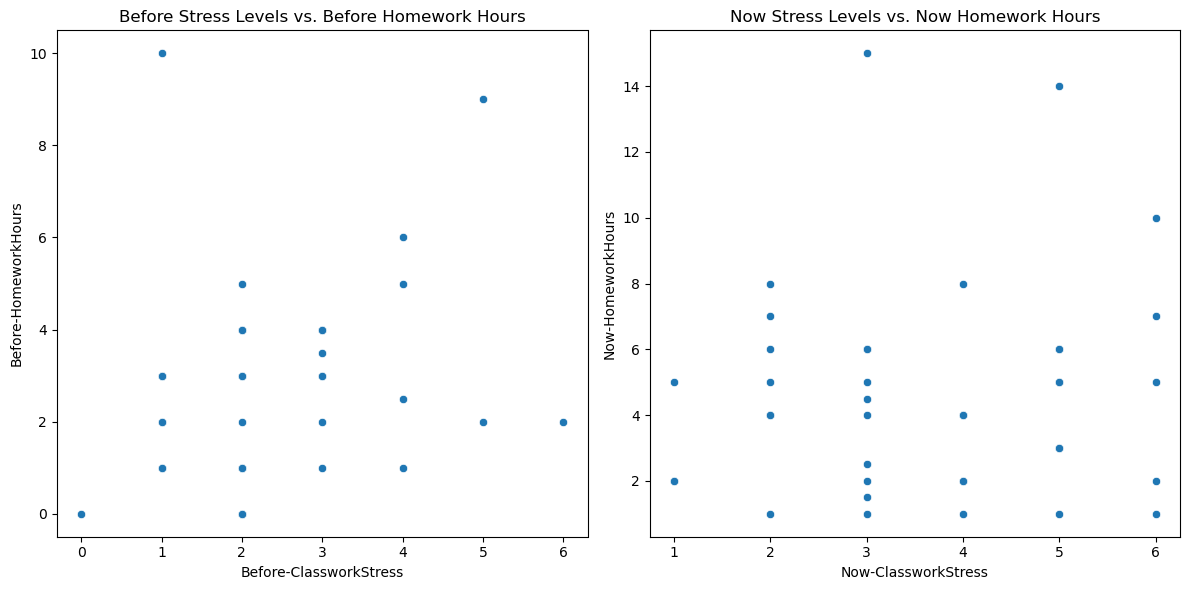

In [23]:
# Set up the figure and axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Scatter plot for Before stress levels vs. Before homework hours
sns.scatterplot(x='Before-ClassworkStress', y='Before-HomeworkHours', data=data, ax=axes[0])
axes[0].set_title('Before Stress Levels vs. Before Homework Hours')

# Scatter plot for Now stress levels vs. Now homework hours
sns.scatterplot(x='Now-ClassworkStress', y='Now-HomeworkHours', data=data, ax=axes[1])
axes[1].set_title('Now Stress Levels vs. Now Homework Hours')

# Show the plots
plt.tight_layout()
plt.show()


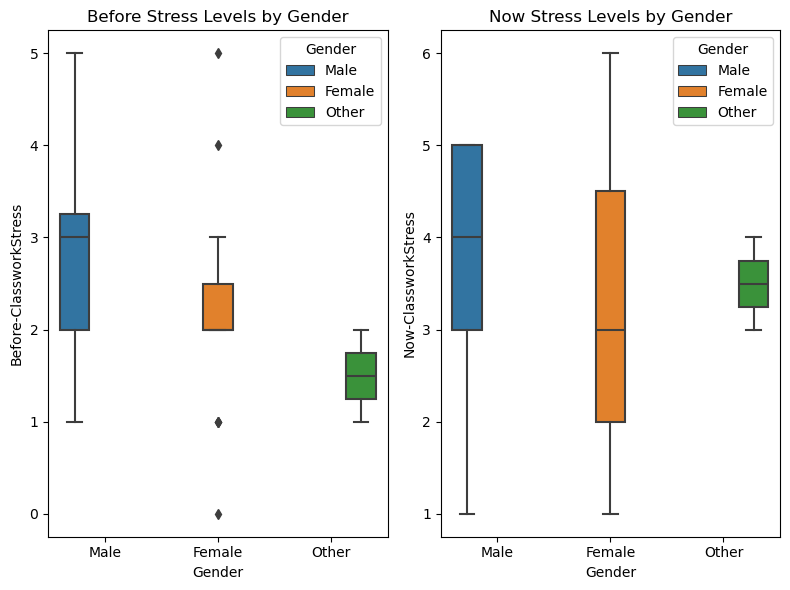

In [24]:
# Set up the figure and axis
plt.figure(figsize=(8, 6))

# Box plot for Before and Now stress levels by Gender
sns.boxplot(x='Gender', y='Before-ClassworkStress', data=data, hue='Gender', ax=plt.subplot(1, 2, 1))
plt.title('Before Stress Levels by Gender')

sns.boxplot(x='Gender', y='Now-ClassworkStress', data=data, hue='Gender', ax=plt.subplot(1, 2, 2))
plt.title('Now Stress Levels by Gender')

# Show the plot
plt.tight_layout()
plt.show()


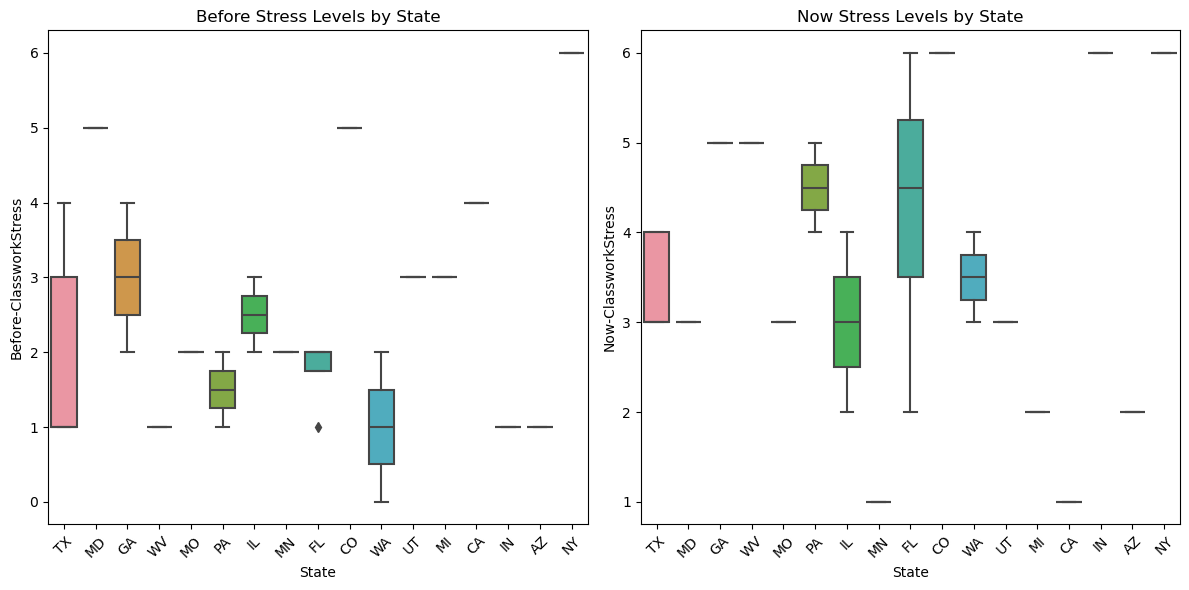

In [27]:
# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Box plot for Before and Now stress levels by State
sns.boxplot(x='State', y='Before-ClassworkStress', data=data, ax=plt.subplot(1, 2, 1))
plt.title('Before Stress Levels by State')
plt.xticks(rotation=45)

sns.boxplot(x='State', y='Now-ClassworkStress', data=data, ax=plt.subplot(1, 2, 2))
plt.title('Now Stress Levels by State')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


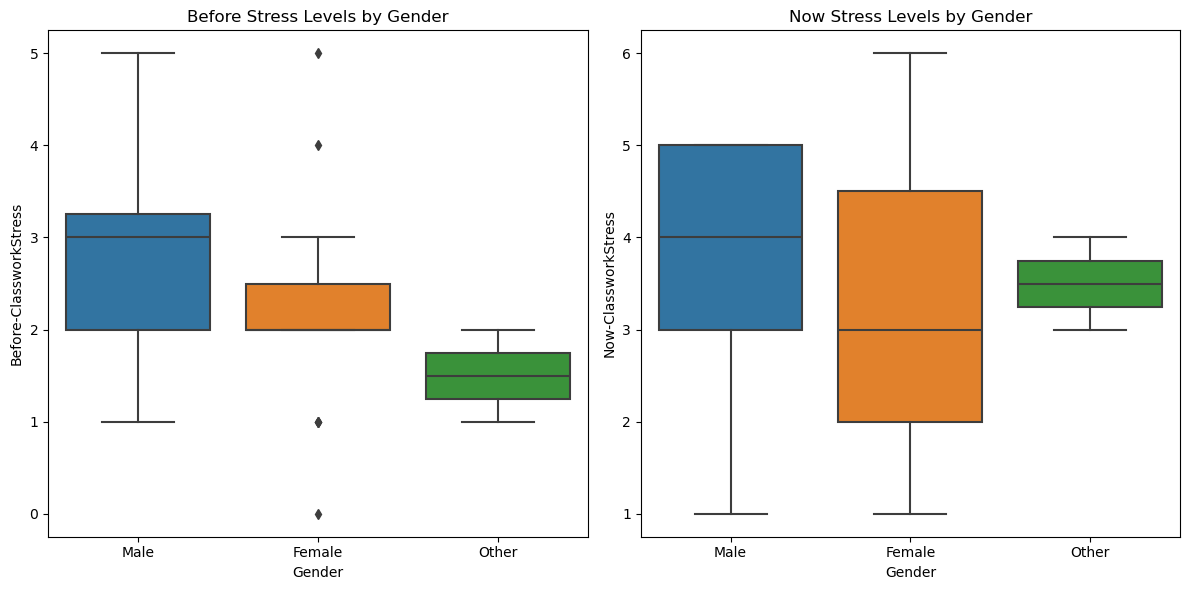

In [28]:
# Set up the figure and axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Box plot for Before and Now stress levels by Gender
sns.boxplot(x='Gender', y='Before-ClassworkStress', data=data, ax=axes[0])
axes[0].set_title('Before Stress Levels by Gender')

sns.boxplot(x='Gender', y='Now-ClassworkStress', data=data, ax=axes[1])
axes[1].set_title('Now Stress Levels by Gender')

# Show the plots
plt.tight_layout()
plt.show()


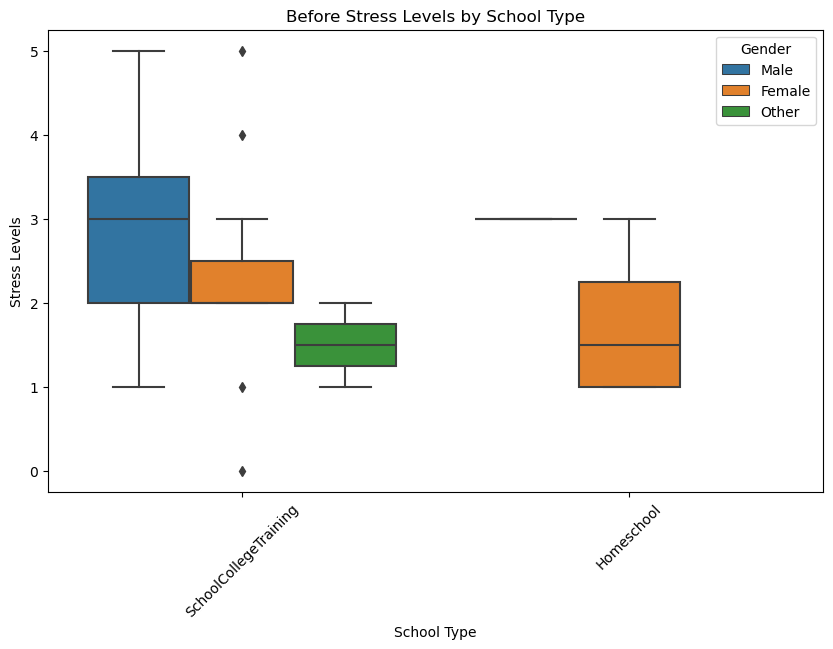

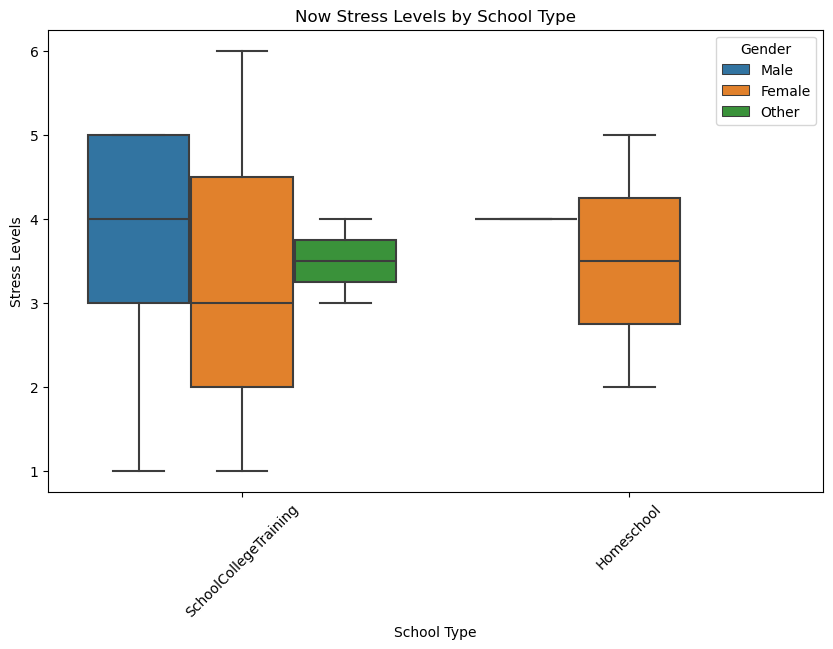

In [31]:
# Box plot for Before and Now stress levels by School Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Before-ClassworkStress', data=data, hue='Gender')
plt.title('Before Stress Levels by School Type')
plt.xlabel('School Type')
plt.ylabel('Stress Levels')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Now-ClassworkStress', data=data, hue='Gender')
plt.title('Now Stress Levels by School Type')
plt.xlabel('School Type')
plt.ylabel('Stress Levels')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.show()


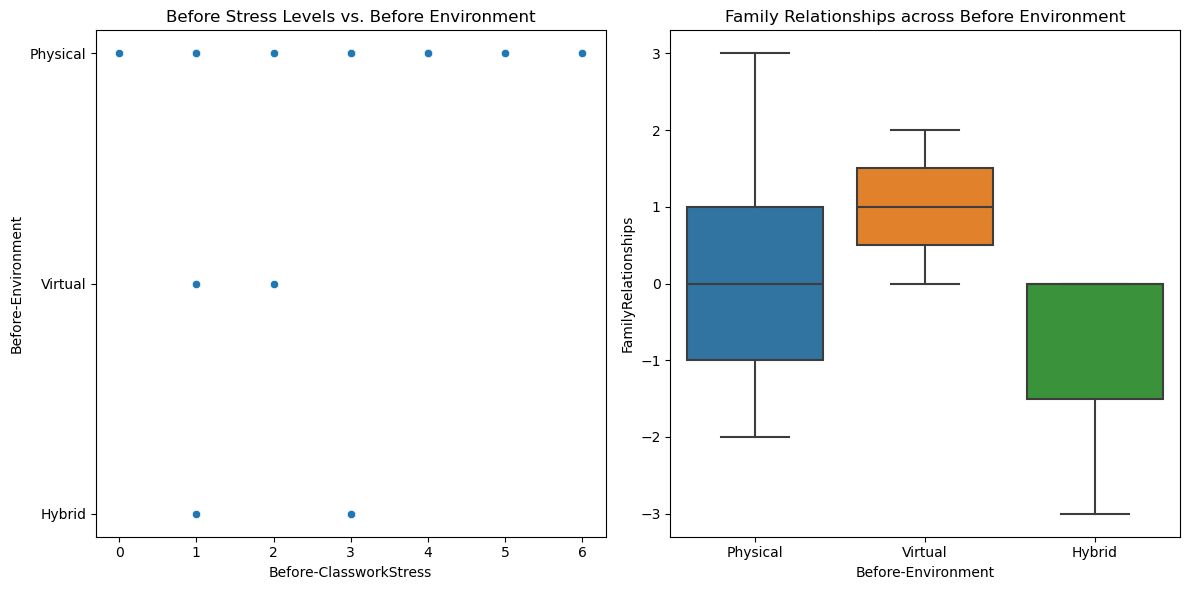

In [32]:
# Set up the figure and axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Scatter plot for Before stress levels vs. Before environment
sns.scatterplot(x='Before-ClassworkStress', y='Before-Environment', data=data, ax=axes[0])
axes[0].set_title('Before Stress Levels vs. Before Environment')

# Box plot for Family Relationships across Before Environment
sns.boxplot(x='Before-Environment', y='FamilyRelationships', data=data, ax=axes[1])
axes[1].set_title('Family Relationships across Before Environment')

# Show the plots
plt.tight_layout()
plt.show()


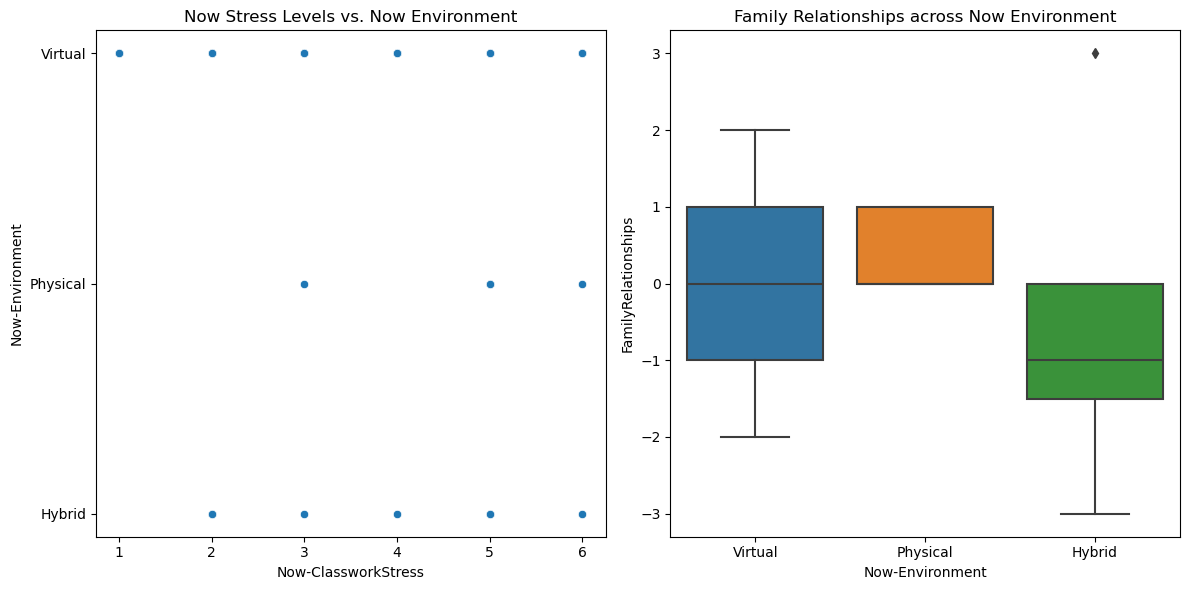

In [33]:
# Set up the figure and axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Scatter plot for Now stress levels vs. Now environment
sns.scatterplot(x='Now-ClassworkStress', y='Now-Environment', data=data, ax=axes[0])
axes[0].set_title('Now Stress Levels vs. Now Environment')

# Box plot for Family Relationships across Now Environment
sns.boxplot(x='Now-Environment', y='FamilyRelationships', data=data, ax=axes[1])
axes[1].set_title('Family Relationships across Now Environment')

# Show the plots
plt.tight_layout()
plt.show()


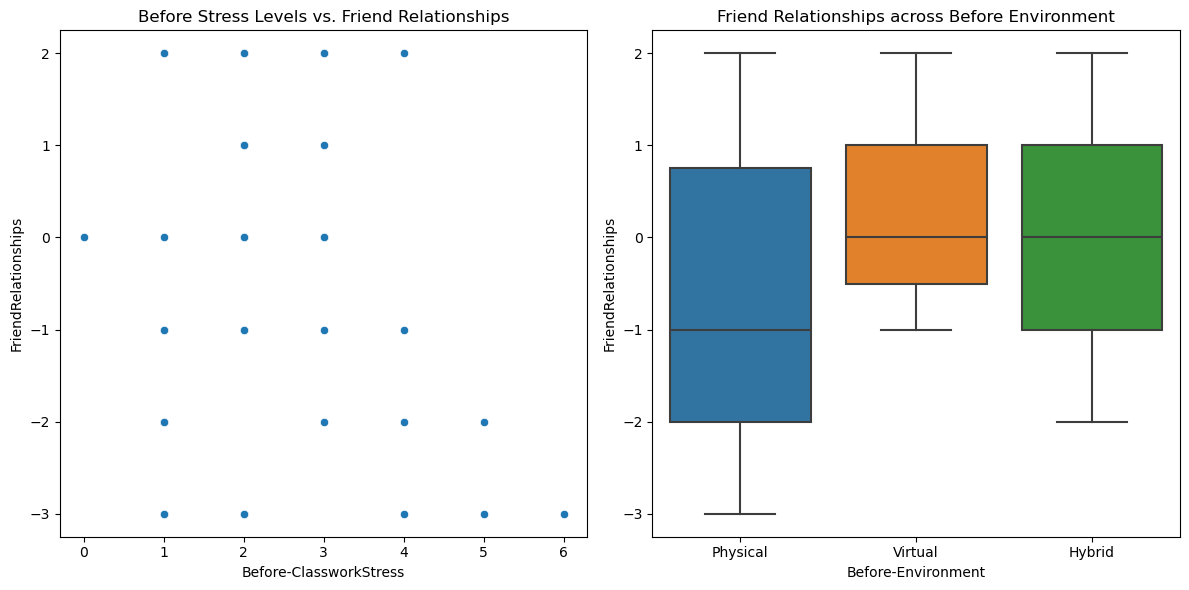

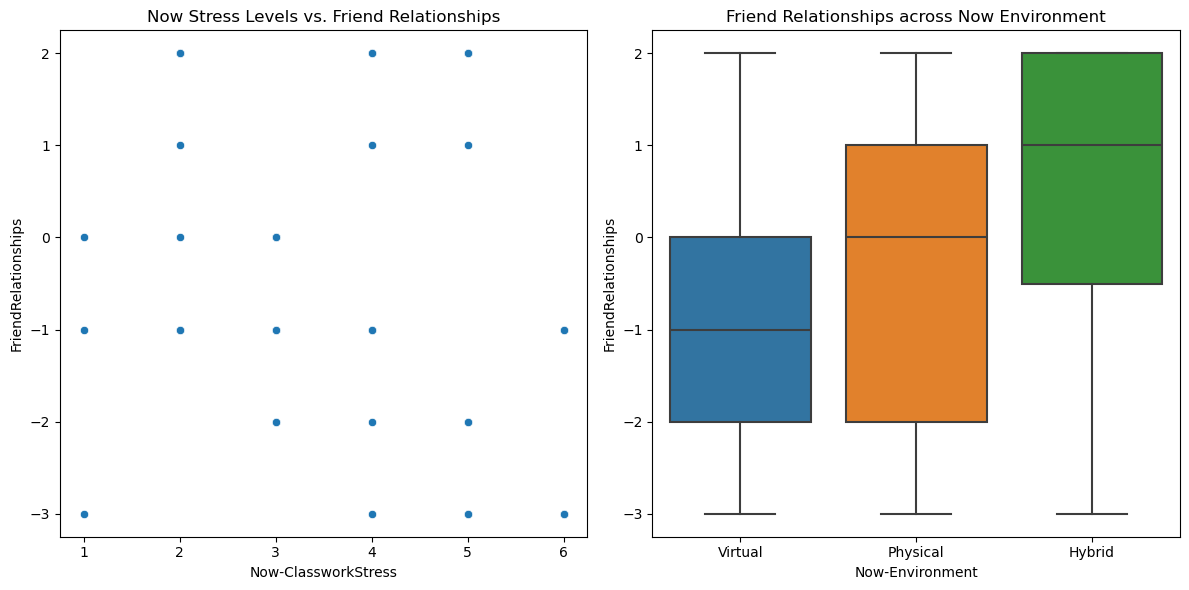

In [34]:
# Set up the figure and axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Scatter plot for Before stress levels vs. Friend relationships
sns.scatterplot(x='Before-ClassworkStress', y='FriendRelationships', data=data, ax=axes[0])
axes[0].set_title('Before Stress Levels vs. Friend Relationships')

# Box plot for Friend Relationships across Before Environment
sns.boxplot(x='Before-Environment', y='FriendRelationships', data=data, ax=axes[1])
axes[1].set_title('Friend Relationships across Before Environment')

# Show the plots
plt.tight_layout()
plt.show()

# Set up the figure and axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Scatter plot for Now stress levels vs. Friend relationships
sns.scatterplot(x='Now-ClassworkStress', y='FriendRelationships', data=data, ax=axes[0])
axes[0].set_title('Now Stress Levels vs. Friend Relationships')

# Box plot for Friend Relationships across Now Environment
sns.boxplot(x='Now-Environment', y='FriendRelationships', data=data, ax=axes[1])
axes[1].set_title('Friend Relationships across Now Environment')

# Show the plots
plt.tight_layout()
plt.show()


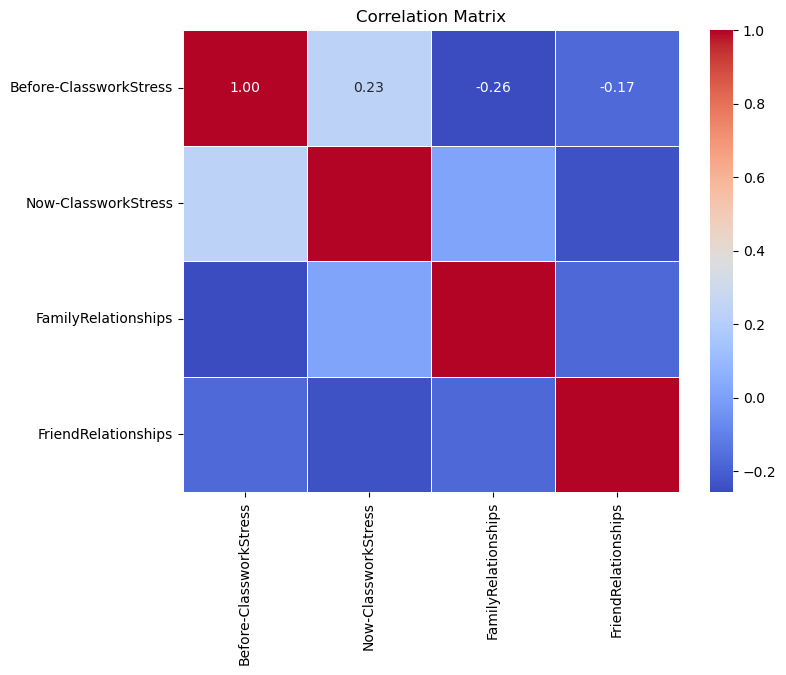

In [41]:
# Step 1: Select key numeric variables (exclude non-numeric or categorical variables)
numeric_variables = ['Before-ClassworkStress', 'Now-ClassworkStress', 'FamilyRelationships', 'FriendRelationships']

# Step 2: Filter the dataframe to include only numeric columns
numeric_data = data[numeric_variables]

# Step 3: Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize correlation matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


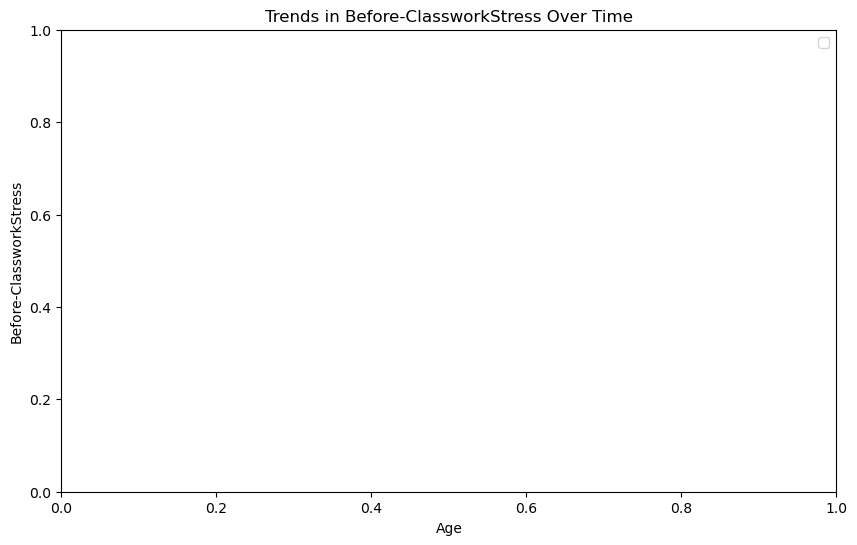

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


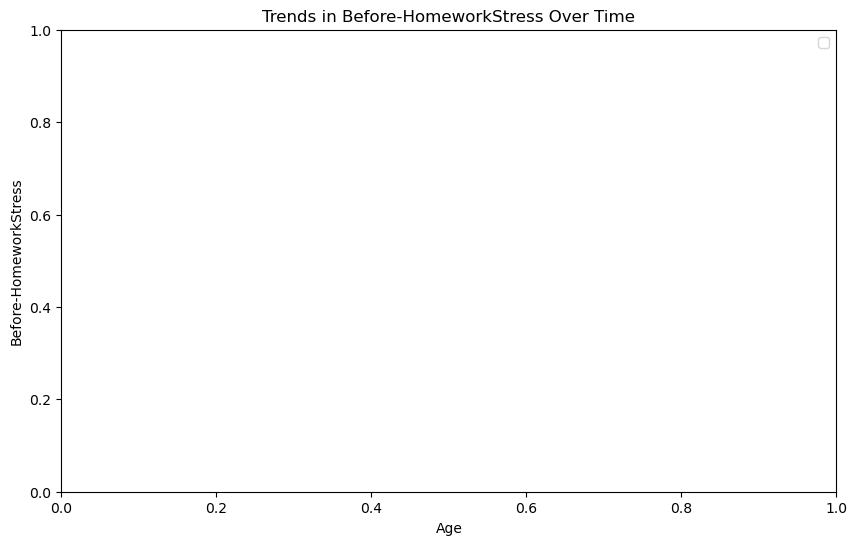

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


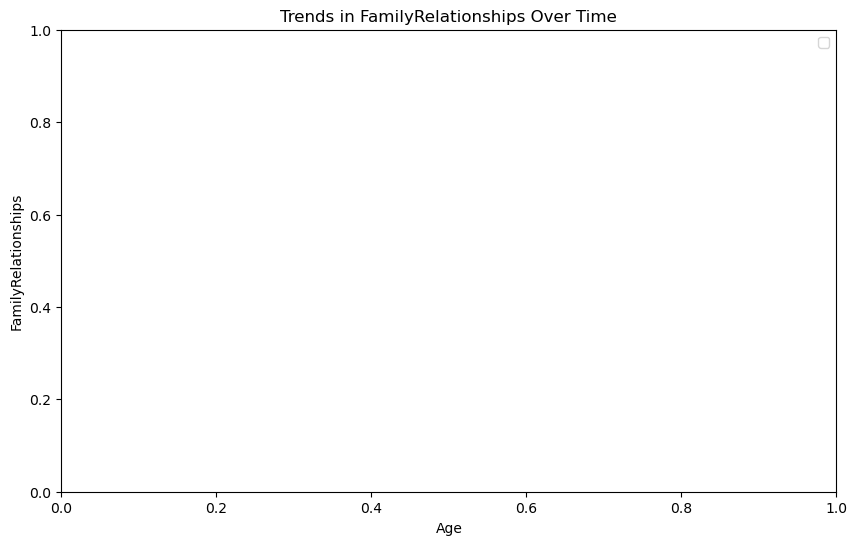

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


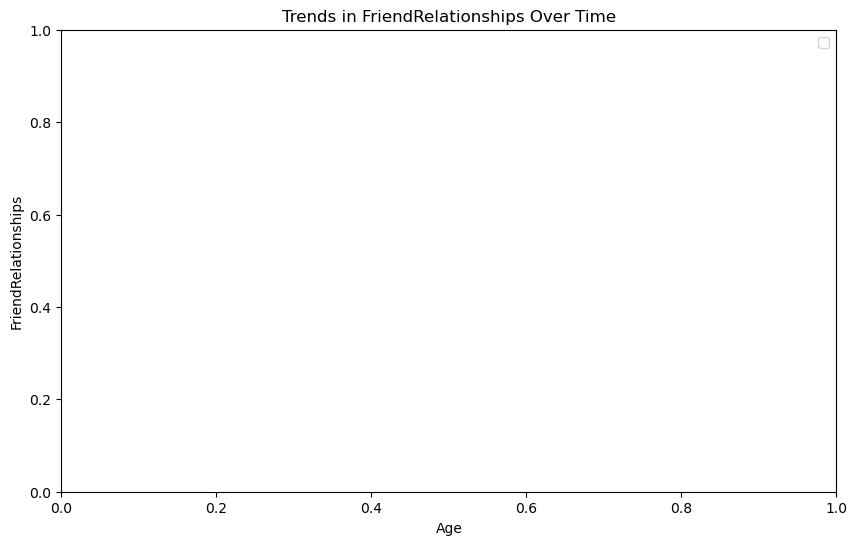

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define Time Periods
time_periods = ['Before', 'During']

# Step 2: Plot Time Series
def plot_time_series(data, variable, time_periods):
    plt.figure(figsize=(10, 6))
    for period in time_periods:
        subset_data = data[data['Category'] == period]
        if not subset_data.empty:
            sns.lineplot(data=subset_data, x='Age', y=variable, label=period)
    plt.title(f'Trends in {variable} Over Time')
    plt.xlabel('Age')
    plt.ylabel(variable)
    plt.legend()  # Add legend
    plt.show()

# Step 3: Identify Patterns and Changes
# Example: Plot trends in stress levels over time
plot_time_series(data, 'Before-ClassworkStress', time_periods)
plot_time_series(data, 'Before-HomeworkStress', time_periods)
plot_time_series(data, 'FamilyRelationships', time_periods)
plot_time_series(data, 'FriendRelationships', time_periods)

# Step 4: Interpret Findings
# Example: Interpret trends in stress levels and relationship dynamics
# You can provide interpretation based on the observed trends and changes in the plots.
